In [13]:
from Functions1 import LoadData
from Functions1 import TestStrategy
from Functions1 import DynamicBacktest
import os
import pandas as pd

import itertools
import random

### Carga de datos

In [2]:
current_directory = os.getcwd()
path = os.path.join(current_directory, 'Stocks_financials')

loader = LoadData(path)
prices, financials = loader.Load(start_date='2005-09-01', end_date=None)

Data processed for the following tickers: AAPL, ABBV, ADM, ADSK, AFL, AMD, CAT, CL, COST, CRM, CVX, DE, DOW, DUK, GE, GOOGL, GS, HD, HON, JNJ, JPM, KO, LMT, MCD, MDLZ, META, MMM, MRK, MSFT, NFLX, NVDA, PG, PLD, QCOM, RTX, SO, SRE, T, TGT, TRYIY, TSLA, TXN, V, VMC, VZ, WMT, XOM, ZBH


### Escenario unico

In [3]:
offensive_tickers = ["MSFT", "AAPL", "GOOGL", 'V', 'NFLX', 'SO', 'DUK', 'VZ', 'T', 'CVX', 'VMC', 'NVDA', 'GE', 'KO', 'JNJ', 'HD', 'AMD', 'ADM', 'META', 'TSLA', 'XOM']   
defensive_tickers = ['COST', 'DUK', 'JNJ', 'KO', 'LMT']      
canary_tickers = ['MSFT', 'V', 'NFLX', 'SO', 'DUK', 'PLD', 'VZ', 'T', 'CVX', 'VMC', 'NVDA', 'GE',
                      'KO', 'JNJ', 'GS', 'HD', 'AMD', 'ADM', 'META', 'GOOGL', 'TSLA', 'JPM', 'XOM', 'AAPL']    

In [4]:
strategy = TestStrategy(prices, financials, offensive_tickers, defensive_tickers, canary_tickers)
chosen_universe = strategy.run_strategy(start_date='2005-09-01')
chosen_universe.head(8)

,Date,Chosen Universe,Selected Stocks
0,2006-09-01,Defensive,"[COST, DUK, JNJ, KO, LMT]"
1,2007-03-01,Offensive,"[CVX, HD, ADM, XOM, MSFT, AAPL, GOOGL, NFLX]"
2,2007-09-01,Offensive,"[DUK, CVX, HD, XOM, ADM, MSFT, AAPL, GOOGL]"
3,2008-03-01,Offensive,"[DUK, CVX, HD, XOM, ADM, MSFT, AAPL, GOOGL]"
4,2008-09-01,Defensive,"[COST, DUK, JNJ, KO, LMT]"
5,2009-03-01,Defensive,"[COST, DUK, JNJ, KO, LMT]"
6,2009-09-01,Defensive,"[COST, DUK, JNJ, KO, LMT]"
7,2010-03-01,Offensive,"[SO, T, CVX, JNJ, ADM, AMD, MSFT, AAPL]"


In [5]:
backtest = DynamicBacktest(chosen_universe, prices, 1000000)
port_values = backtest.get_portfolio_values()
port_values

,Date,Sortino Portfolio Value,Sharpe Portfolio Value,CVaR Portfolio Value,benchmark Portfolio Value
0,2006-09-01,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
1,2006-09-02,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
2,2006-09-03,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
3,2006-09-04,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
4,2006-09-05,9.987625e+05,9.987625e+05,9.987625e+05,1.001709e+06
...,...,...,...,...,...
6614,2024-10-10,9.052634e+06,9.137529e+06,9.125412e+06,4.308434e+06
6615,2024-10-11,9.057747e+06,9.157393e+06,9.150215e+06,4.308434e+06
6616,2024-10-12,9.057747e+06,9.157393e+06,9.150215e+06,4.308434e+06
6617,2024-10-13,9.057747e+06,9.157393e+06,9.150215e+06,4.308434e+06


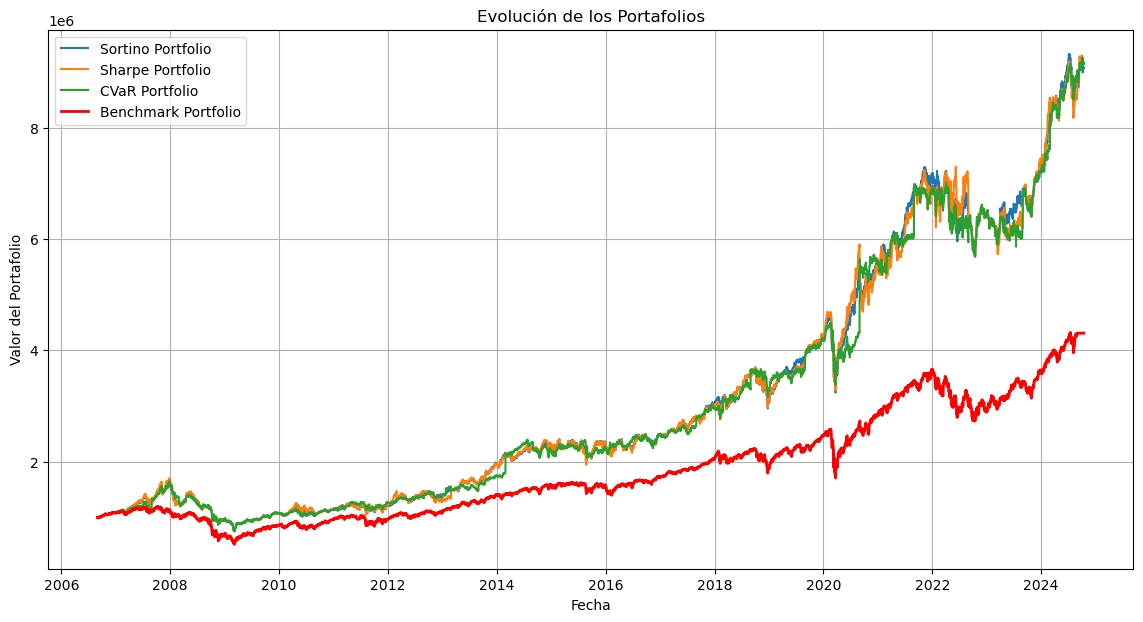

In [6]:
backtest.plot_strategies()

In [7]:
backtest.evaluate_portfolios().T

,Sortino,Sharpe,CVaR,benchmark
mean_return,0.097202,0.100161,0.097446,0.069177
CAGR,0.087583,0.087995,0.088004,0.057182
Sharpe Ratio,0.597985,0.563658,0.593657,0.420705
Sortino Ratio,0.649436,0.616291,0.744656,0.421841
Treynor Ratio,0.000463,0.000475,0.000569,0.000274
Volatility,0.162550,0.177698,0.164145,0.164431
VaR,-0.016248,-0.017395,-0.012909,-0.015184
Beta,0.833507,0.836825,0.679809,1.000151
Recovery Time,6614.000000,6614.000000,6614.000000,6613.000000
Tracking Error,0.091633,0.115634,0.131250,0.000000


-------

### Simulaciones del metodo con Portafolios aleatorios

In [29]:
offensive_tickers = ['AAPL', 'ADM', 'ADSK', 'AMD', 'CAT', 'CRM', 'CVX', 'DE', 'DOW', 'GE', 'GOOGL', 'HD', 'HON','META',
                     'MMM', 'MSFT', 'NFLX', 'NVDA', 'QCOM', 'RTX', 'TGT', 'TRYIY', 'TSLA', 'TXN', 'V', 'VMC', 'XOM']

defensive_tickers = ['CL', 'COST', 'DUK', 'JNJ', 'KO', 'LMT', 'MCD', 'MDLZ', 'MRK', 'PG', 'SO',
 'SRE', 'T', 'VZ', 'WMT', 'ZBH'] 

canary_tickers = [
    # Tecnología
    'AAPL', 'MSFT', 'NVDA',
    # Finanzas
    'JPM', 'GS',
    # Energía
    'XOM', 'CVX',
    # Consumo Discrecional
    'TSLA', 'HD', 'AMZN',
    # Consumo Básico
    'PG', 'KO', 'PEP',
    # Salud
    'JNJ', 'ABBV',
    # Industriales
    'CAT', 'HON', 'MMM',
    # Telecomunicaciones
    'VZ', 'T',
    # Bienes Raíces
    'PLD',
    # Materiales
    'VMC',
    # Utilidades
    'NEE', 'DUK'
]

In [ ]:
n_portfolios = 2500

def get_random_combinations(tickers, n, sample_size):
    try:
        return random.sample(list(itertools.combinations(tickers, n)), sample_size)
    except ValueError as e:
        print(f"Error while generating combinations: {e}")
        return []

offensive_combinations = get_random_combinations(offensive_tickers, 16, n_portfolios)
defensive_combinations = get_random_combinations(defensive_tickers, 5, n_portfolios)

results = []

for offensive_combo, defensive_combo in zip(offensive_combinations, defensive_combinations):
    

    try:
        strategy = TestStrategy(prices, financials, list(offensive_combo), list(defensive_combo), canary_tickers)
        
        chosen_universe = strategy.run_strategy(start_date='2005-09-01')
        
        backtest = DynamicBacktest(chosen_universe, prices, 1000000)
        port_values = backtest.get_portfolio_values()
        evaluation = backtest.evaluate_portfolios().T
        
        results.append({
            'Offensive Combination': offensive_combo,
            'Defensive Combination': defensive_combo,
            'Evaluation': evaluation
        })
        
    except Exception as e:
        print(f"Error with offensive {offensive_combo} and defensive {defensive_combo}: {str(e)}")

final_results = pd.DataFrame(results)

Testing with offensive: ('AMD', 'CAT', 'CRM', 'CVX', 'DE', 'DOW', 'GE', 'HD', 'META', 'MMM', 'NFLX', 'NVDA', 'RTX', 'TSLA', 'V', 'XOM') and defensive: ('COST', 'MCD', 'MDLZ', 'MRK', 'VZ')
Testing with offensive: ('AAPL', 'ADSK', 'CVX', 'DE', 'DOW', 'GOOGL', 'HD', 'HON', 'META', 'NFLX', 'NVDA', 'RTX', 'TGT', 'TRYIY', 'TSLA', 'XOM') and defensive: ('CL', 'DUK', 'SRE', 'VZ', 'WMT')
Testing with offensive: ('ADM', 'CAT', 'CRM', 'CVX', 'DE', 'DOW', 'GOOGL', 'MMM', 'NFLX', 'QCOM', 'RTX', 'TGT', 'TRYIY', 'V', 'VMC', 'XOM') and defensive: ('PG', 'SRE', 'VZ', 'WMT', 'ZBH')
Testing with offensive: ('AAPL', 'ADM', 'ADSK', 'CAT', 'CRM', 'CVX', 'DOW', 'GOOGL', 'HD', 'META', 'MMM', 'MSFT', 'NFLX', 'QCOM', 'TGT', 'TRYIY') and defensive: ('JNJ', 'PG', 'T', 'VZ', 'ZBH')
Testing with offensive: ('AAPL', 'AMD', 'CAT', 'CRM', 'DE', 'GE', 'GOOGL', 'HD', 'MSFT', 'NVDA', 'RTX', 'TGT', 'TRYIY', 'TSLA', 'V', 'XOM') and defensive: ('COST', 'LMT', 'SO', 'VZ', 'ZBH')
Testing with offensive: ('ADM', 'AMD', 'CRM', 

In [ ]:
all_evaluations = pd.concat([result['Evaluation'] for result in results], keys=range(len(results)))

average_evaluation = all_evaluations.groupby(level=1).mean()

In [ ]:
metric_summary = pd.DataFrame({
    'Offensive Combination': [result['Offensive Combination'] for result in results],
    'Defensive Combination': [result['Defensive Combination'] for result in results],
    'Sharpe Ratio': [result['Evaluation'].loc['Sharpe Ratio', 'Sharpe'] for result in results],
    'CAGR': [result['Evaluation'].loc['CAGR', 'Sharpe'] for result in results],
    'Max Drawdown': [result['Evaluation'].loc['Max Drawdown', 'Sharpe'] for result in results]
})

best_sharpe_portfolio = metric_summary.loc[metric_summary['Sharpe Ratio'].idxmax()]
best_cagr_portfolio = metric_summary.loc[metric_summary['CAGR'].idxmax()]
best_drawdown_portfolio = metric_summary.loc[metric_summary['Max Drawdown'].idxmin()]

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
average_evaluation['Sharpe Ratio'].plot(ax=ax, label='Promedio de todas las combinaciones', linestyle='--', color='blue')
best_sharpe_portfolio['Sharpe Ratio'].plot(ax=ax, label='Mejor Portafolio (Sharpe Ratio)', linestyle='-', color='green')
plt.title('Comparación de Rendimiento Basado en Sharpe Ratio')
plt.ylabel('Sharpe Ratio')
plt.xlabel('Fecha')
plt.legend()
plt.grid(True)
plt.show()

--------

In [21]:
ratios_to_check = [
    'Return on Common Equity',
    'Operating Margin',
    'Cash Flow per Share',
    'Current Ratio (x)',
    'Total Debt/Equity (%)',
    'Total Shares Outstanding  (M)',
    'Price/Earnings'
]

tickers_with_all_ratios = []

for ticker, df in financials.items():
    if all(ratio in df['Financial Ratio'].values for ratio in ratios_to_check):
        tickers_with_all_ratios.append(ticker)

tickers_with_all_ratios

['AAPL',
 'ABBV',
 'ADM',
 'ADSK',
 'AMD',
 'CAT',
 'CL',
 'CRM',
 'CVX',
 'DE',
 'DOW',
 'DUK',
 'GE',
 'GOOGL',
 'HD',
 'HON',
 'JNJ',
 'KO',
 'LMT',
 'MCD',
 'MDLZ',
 'META',
 'MMM',
 'MRK',
 'MSFT',
 'NFLX',
 'NVDA',
 'PG',
 'QCOM',
 'RTX',
 'SO',
 'SRE',
 'T',
 'TGT',
 'TRYIY',
 'TSLA',
 'TXN',
 'V',
 'VMC',
 'VZ',
 'WMT',
 'XOM',
 'ZBH']

In [23]:
all_tickers = [
    'AAPL', 'ABBV', 'ADM', 'ADSK', 'AFL', 'AMD', 'CAT', 'CL', 'COST', 'CRM', 'CVX',
    'DE', 'DOW', 'DUK', 'GE', 'GOOGL', 'GS', 'HD', 'HON', 'JNJ', 'JPM', 'KO', 'LMT', 
    'MCD', 'MDLZ', 'META', 'MMM', 'MRK', 'MSFT', 'NFLX', 'NVDA', 'PG', 'PLD', 'QCOM', 
    'RTX', 'SO', 'SRE', 'T', 'TGT', 'TRYIY', 'TSLA', 'TXN', 'V', 'VMC', 'VZ', 'WMT', 
    'XOM', 'ZBH'
]

tickers_without_all_ratios = [ticker for ticker in all_tickers if ticker not in tickers_with_all_ratios]
tickers_without_all_ratios

['AFL', 'COST', 'GS', 'JPM', 'PLD']

In [25]:
tickers_to_check = [
    'ABBV', 'CL', 'COST', 'DUK', 'JNJ', 'KO', 'LMT', 'MCD', 'MDLZ', 'MRK', 
    'PG', 'SO', 'SRE', 'T', 'VZ', 'WMT', 'ZBH'
]

tickers_with_initial_date = []

for ticker in tickers_to_check:
    first_date = pd.to_datetime(prices[ticker].index[0])
    
    if first_date == pd.to_datetime('2005-09-01'):
        tickers_with_initial_date.append(ticker)

tickers_with_initial_date

['CL',
 'COST',
 'DUK',
 'JNJ',
 'KO',
 'LMT',
 'MCD',
 'MDLZ',
 'MRK',
 'PG',
 'SO',
 'SRE',
 'T',
 'VZ',
 'WMT',
 'ZBH']

In [27]:
missing_tickers = [ticker for ticker in canary_tickers if ticker not in all_tickers]

missing_tickers

['BRK.B', 'AMZN', 'PEP', 'PFE', 'NEE']